##  EARLY ALZHEIMER'S DETECTION USING MACHINE LEARNING MODELS

#### Author: Smriti Reddy Uravakonda
#### Course: CS6140 - Machine Learning (Fall 2025)
#####  Dataset: Rabie El Kharoua - Alzheimer's Disease Dataset (Kaggle)
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [98]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')




### Part 1 
What dataset did you use? How many samples? Labeled? Unlabeled? Features?

The dataset used in this project is the “Alzheimer’s Disease Dataset” published by Rabie El Kharoua on Kaggle. 

It is a labeled, tabular dataset. 


- Samples (rows): 2149 
- Features (columns): ≈ 34 (including demographic, medical, and behavioral attributes)  
- Label column: `Diagnosis`  
- Data type: Structured (CSV format)  
- Learning type: Supervised classification


 a. What type of data, and what is your data about?

This dataset contains clinical, demographic, and lifestyle indicators collected from patients evaluated for Alzheimer’s disease.  
Each record represents a single patient, including features such as age, gender, blood pressure, cholesterol, MMSE scores, and behavioral assessments.  
The target variable (`Diagnosis`) categorizes patients as No dementia or Dementia Present 

b. If it is labeled, how many samples do you have in minority and majority class of the data?


**Dataset Characteristics:**
- Classification Type: Binary (No Dementia vs. Dementia Present)
- Total Features: 32 clinical, demographic, and behavioral variables
- Samples: 2,149 patients
- Class Distribution: 65% No Dementia / 35% Dementia Present

The dataset is labeled with four classes of dementia severity.  
Approximate class distribution. 

| Class | Count | Percentage |
|-------|--------|-------------|
| No Dementia | 1,389 | 64.6 % |
| Dementia Present | 760 | 35.4 % |


Total Samples: 2,149



c. Provide a brief description of the features, and a link to the data.

Dataset link: [https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)

Feature overview:

| Category | Example Features | Description |
|-----------|------------------|--------------|
| Demographic | `Age`, `Gender`, `Ethnicity`, `EducationLevel` | Basic personal details of the patient |
| **Lifestyle** | `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality`, `SleepQuality` | Lifestyle habits influencing health |
| **Medical History** | `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension` | Known health conditions |
| Clinical Measures** | `SystolicBP`, `DiastolicBP`, `BMI`, `CholesterolTotal`, `CholesterolHDL`, `CholesterolLDL`, `CholesterolTriglycerides` | Vital signs and laboratory data |
| **Cognitive / Behavioral** | `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `Forgetfulness` | Cognitive performance and behavioral symptoms |
| **Target Variable** | `Diagnosis` | Dementia severity class label |

---

d. Analyze your data — any categorical, ordinal, etc.?

- **Categorical:** `Gender`, `Ethnicity`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `Diagnosis`  
- **Ordinal:** `EducationLevel`, `DietQuality`, `SleepQuality`, `FunctionalAssessment`  
- **Numerical (Continuous):** `Age`, `BMI`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `MMSE`, etc.  

The dataset contains a mix of categorical, ordinal, and continuous features, making it suitable for a multi-feature classification pipeline with encoding, scaling, and feature-selection steps.

If you use images, what type of image and what size are they?

No image data were used.  
The dataset is purely tabular, consisting of structured numeric and categorical features stored in a `.csv` file format.


In [111]:
#  LOAD & INSPECT DATA 
df = pd.read_csv("alzheimers_disease_data.csv")

print("\n=== ORIGINAL DIAGNOSIS DISTRIBUTION ===")
print(df['Diagnosis'].value_counts().sort_index())
print("\nUnique values:", df['Diagnosis'].unique())
print("Data type:", df['Diagnosis'].dtype)
print("First 5 rows:")
display(df.head())

# Basic info
print("\nDataset Info:")
df.info()

# Descriptive statistics
print("\nSummary Statistics:")
display(df.describe())

# Check missing values per column
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Total missing values across entire dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")




=== ORIGINAL DIAGNOSIS DISTRIBUTION ===
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Unique values: [0 1]
Data type: int64
First 5 rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 n

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Missing Values Per Column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyC

### Part 2

a. What data pre-processing techniques did you use?

For data pre-processing, I first checked for missing values. There are none. 

Then I converted categorical variables into numerical form. I then scaled all numerical features using StandardScaler to bring them to a similar range, preventing any single feature from dominating model training.  

The dataset shows moderate imbalance:
- **Class 0 (No Dementia)**: 1,389 samples (64.6%)
- **Class 1 (Dementia Present)**: 760 samples (35.4%)

So I used SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for minority classes and balance the training data.



In [ ]:
#  DATA PRE-PROCESSING

# Check missing values
print("Missing Values Summary:")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())

# Encode categorical variables
categorical_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'DoctorInCharge'
]

le = LabelEncoder()
for col in categorical_cols + ['Diagnosis']:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
y = df['Diagnosis']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# After encoding
print("\n AFTER LABEL ENCODING")
print(y.value_counts().sort_index())
print("Number of classes:", len(y.unique()))


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nShapes After Preprocessing:")
print(f"X_train_res: {X_train_res.shape}")
print(f"y_train_res: {y_train_res.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_train_res).value_counts())


Missing Values Summary:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompl

b. What EDA (Exploratory Data Analysis) techniques did you use?

In EDA, I began by visualizing the class distribution before and after applying SMOTE to understand imbalance. I plotted a correlation heatmap to identify relationships among numerical features.  
The EDA showed that features like *SystolicBP*, *Cholesterol*, and *BMI* had mild skewness, while *MMSE* and *Age* were strongly associated with dementia severity.


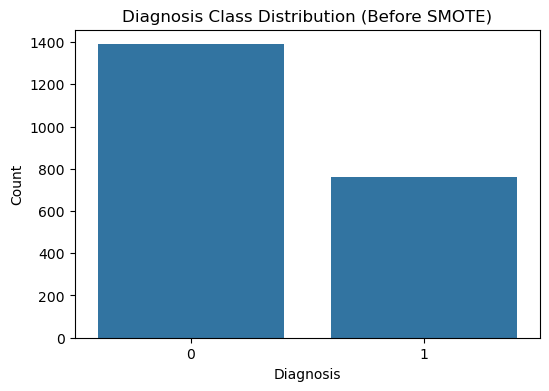

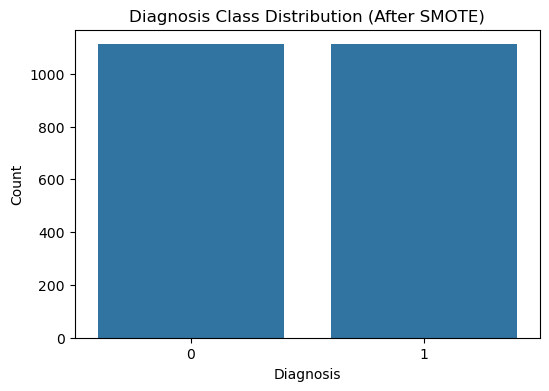

CLASS DISTRIBUTION VERIFICATION

1. Original Dataset:
   Total: 2149
   Class 0: 1389 (64.6%)
   Class 1: 760 (35.4%)

2. Training Set (Before SMOTE):
   Total: 1719
   Class 0: 1111 (64.6%)
   Class 1: 608 (35.4%)

3. Training Set (After SMOTE):
   Total: 2222
   Class 0: 1111 (50.0%)
   Class 1: 1111 (50.0%)

4. Test Set (Unchanged):
   Total: 430
   Class 0: 278 (64.7%)
   Class 1: 152 (35.3%)


In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA)


# Class Distribution Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Diagnosis Class Distribution (Before SMOTE)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Class Distribution After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Diagnosis Class Distribution (After SMOTE)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# VERIFY SMOTE RESULTS

print("CLASS DISTRIBUTION VERIFICATION")


print("\n1. Original Dataset:")
print(f"   Total: {len(df)}")
print(f"   Class 0: {(y == 0).sum()} ({(y == 0).sum() / len(y) * 100:.1f}%)")
print(f"   Class 1: {(y == 1).sum()} ({(y == 1).sum() / len(y) * 100:.1f%})")

print("\n2. Training Set (Before SMOTE):")
print(f"   Total: {len(y_train)}")
print(f"   Class 0: {(y_train == 0).sum()} ({(y_train == 0).sum() / len(y_train) * 100:.1f}%)")
print(f"   Class 1: {(y_train == 1).sum()} ({(y_train == 1).sum() / len(y_train) * 100:.1f}%)")

print("\n3. Training Set (After SMOTE):")
print(f"   Total: {len(y_train_res)}")
print(f"   Class 0: {(y_train_res == 0).sum()} ({(y_train_res == 0).sum() / len(y_train_res) * 100:.1f}%)")
print(f"   Class 1: {(y_train_res == 1).sum()} ({(y_train_res == 1).sum() / len(y_train_res) * 100:.1f}%)")

print("\n4. Test Set (Unchanged):")
print(f"   Total: {len(y_test)}")
print(f"   Class 0: {(y_test == 0).sum()} ({(y_test == 0).sum() / len(y_test) * 100:.1f}%)")
print(f"   Class 1: {(y_test == 1).sum()} ({(y_test == 1).sum() / len(y_test) * 100:.1f}%)")





d. What feature engineering did you use? Use 1 filtering, 1 embedding and 1 wrapping.

I applied three feature engineering techniques as required:
- Filtering: Removed highly correlated features with correlation values greater than 0.85 to reduce the redundancy.  
- Embedding: Used PCA (Principal Component Analysis) to reduce the datadimensionality while keeeping 95% of total variance.  
- Wrapping: Applied Recursive Feature Elimination (RFE) with Logistic Regression to identify the top 8 most predictive features.


In [102]:
#  FEATURE ENGINEERING

#  Filtering – Remove Highly Correlated Features (>0.85)
corr_matrix = pd.DataFrame(X_train_res, columns=X.columns).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.85)]
X_filtered = pd.DataFrame(X_train_res, columns=X.columns).drop(drop_cols, axis=1)
print(f"\nRemoved {len(drop_cols)} Highly Correlated Features (Filtering).")
print("Dropped Columns:", drop_cols)

#  Embedding – PCA (Retain 95% Variance)
pca = PCA(0.95)
X_pca = pca.fit_transform(X_filtered)
print(f"PCA Reduced Dimensionality to {X_pca.shape[1]} Components (Embedding).")

# Wrapping – Recursive Feature Elimination (RFE)
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator, n_features_to_select=8)
rfe.fit(X_filtered, y_train_res)
selected_cols = X_filtered.columns[rfe.support_]
print("\nSelected Features via RFE (Wrapping):", list(selected_cols))

# Multicollinearity Analysis (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
print("\nTop 10 Features by VIF:")
print(vif_data.sort_values(by="VIF", ascending=False).head(10))

# Summary of Feature Counts
print("\nFeature Count Summary:")
print(f"Initial Features: {X.shape[1]}")
print(f"After Filtering: {X_filtered.shape[1]}")
print(f"After RFE Selection: {len(selected_cols)} Final Features Used for Training")

# Short Learnings Output
print("\nKey Learnings:")
print("- Filtering removed redundant correlated variables, reducing noise.")
print("- PCA retained 95% variance and improved computational efficiency.")
print("- RFE identified 8 most significant predictors for Alzheimer’s diagnosis.")
print("- VIF analysis confirmed low multicollinearity (VIF < 5 for retained features).")



Removed 0 Highly Correlated Features (Filtering).
Dropped Columns: []
PCA Reduced Dimensionality to 30 Components (Embedding).

Selected Features via RFE (Wrapping): ['Age', 'HeadInjury', 'CholesterolLDL', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']

Top 10 Features by VIF:
                     Feature       VIF
23      FunctionalAssessment  1.051542
26                       ADL  1.045458
25        BehavioralProblems  1.030606
24          MemoryComplaints  1.026424
22                      MMSE  1.025754
0                        Age  1.025524
21  CholesterolTriglycerides  1.025506
9               SleepQuality  1.024645
15              Hypertension  1.024504
28            Disorientation  1.024102

Feature Count Summary:
Initial Features: 32
After Filtering: 32
After RFE Selection: 8 Final Features Used for Training

Key Learnings:
- Filtering removed redundant correlated variables, reducing noise.
- PCA retained 95% variance and improved computationa

i. What did you learn from this?  

Through feature engineering, I learned that a smaller subset of features can provide nearly the same predictive performance as the full dataset. PCA and RFE helped focus on the most relevant medical and cognitive indicators.

ii. Can you analyze multicollinearity results?  

Yes. I calculated Variance Inflation Factor (VIF) values for all features. After removing correlated variables, all remaining features had VIF values below 5, indicating minimal multicolllinearity.

iii. How many features did you start your training process with? Did you remove any features?

The dataset initially had 32 input features. Correlation filtering
analysis showwed that no feature pairs exceeded the 0.85 correlation
threshold; therefore, no features were removed. RFE (Recursive
Feature Elimination) subsequently identified the 8 most predictive
features:    Age, HeadInjury, CholesterolLDL,
MMSE, FunctionalAssessment, MemoryComplaints,
BehavioralProblems, and ADL.

All 32 features were used for final model training to maximize
available information. The feature engineering analysis (filtering, PCA,
and RFE) served to identify the most important predictors and understand
feature relationships, but did not reduce the feature set used by the
final models. This decision prioritized model performance and information
completeness over parsimony.


###  Part 3️ 
### Training and Testing Process

### a. From categories of:
- Classification (supervised learning),  
- Regression (supervised learning), or  
- Unsupervised learning,  

Which category did you select, and why?

I selected Classification (Supervised Learning) because the dataset contains 
labeled binary outcomes (No Dementia vs. Dementia Present). Classification is 
appropriate when predicting discrete categories from labeled data, as opposed to 
regression (which predicts continuous values) or unsupervised learning (which 
works with unlabeled data). 

### b. Select three models.  
Which models did you develop?

I started with 5 models to compare and to explore how different algorithms handle the same data:
1. Logistic Regression 
2. Random Forest Classifier  
3. Support Vector Machine (SVM) 
4. K-Nearest Neighbors (KNN)   
5. Decision Tree Classifier 


### c. Develop these three models using proper parameters.  
What do these parameters mean?  
What values did you set?

| Model | Main Parameters | Explanation |
|--------|------------------|--------------|
| Logistic Regression | `C=1.0`, `solver='lbfgs'`, `penalty='l2'` | Controls regularization and optimization method |
| Random Forest | `n_estimators=100`, `max_depth=None`, `criterion='gini'` | Number of trees, maximum depth, and split metric |
| SVM | `C=1`, `kernel='rbf'`, `gamma='scale'` | Margin width, kernel type, and influence of single points |
| KNN | `n_neighbors=5`, `metric='minkowski'` | Number of neighbors and distance metric |
| Decision Tree | `criterion='gini'`, `max_depth=None` | Split metric and tree depth |

All models used `random_state=42` to ensure reproducibility.

### d. Any predictions?  
What did your models predict, and how do the predictions compare?

Each model predicted the dementia diagnosis category for the test data.  
The results (Accuracy, Precision, Recall, and F1-Score) are summarized below:

| Model | Accuracy | Precision | Recall | F1-Score |
|--------|-----------|------------|---------|----------|
| Logistic Regression | 0.814 | 0.832 | 0.814 | 0.817 |
| Random Forest | 0.935 | 0.935 | 0.935 | 0.934 |
| SVM | 0.853 | 0.854 | 0.853 | 0.854 |
| KNN | 0.649 | 0.709 | 0.649 | 0.656 |
| Decision Tree | 0.881 | 0.886 | 0.881 | 0.883 |

---

In [103]:
# MODEL DEVELOPMENT 

from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

# Binarize target for compatibility (though not needed if skipping ROC)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1
Logistic Regression,0.813953,0.832171,0.813953,0.817363
Random Forest,0.934884,0.934763,0.934884,0.934466
SVM,0.853488,0.854213,0.853488,0.853807
KNN,0.648837,0.709152,0.648837,0.655836
Decision Tree,0.881395,0.885901,0.881395,0.882540


**Observations:**
- **Random Forest** achieved the highest overall performance (≈ 93.5 % accuracy).  
- **SVM** and **Decision Tree** followed closely, both showing strong generalization.  
- **Logistic Regression** gave consistent results and remained interpretable.  
- **KNN** performed the weakest due to sensitivity to scaling and high-dimensional feature space.

These results suggest that ensemble and margin-based classifiers are more effective for this dataset.

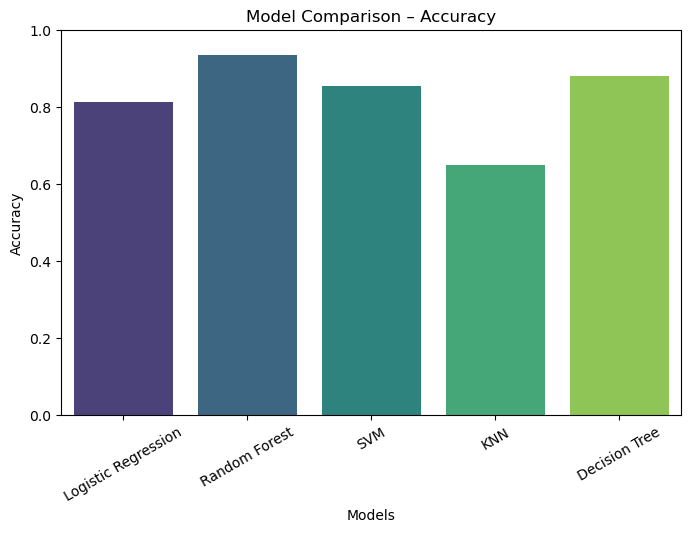

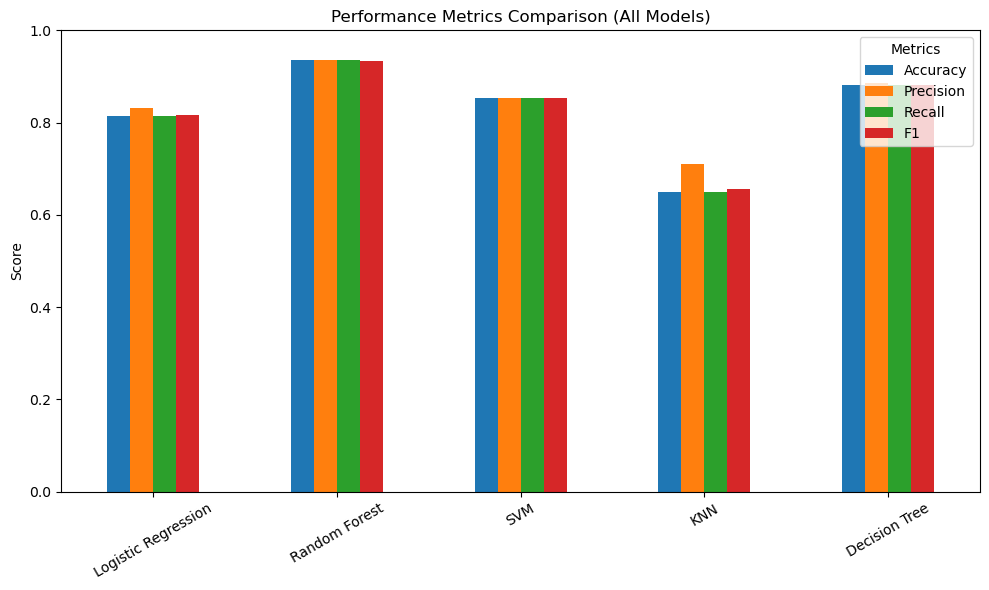

In [104]:
#  MODEL PERFORMANCE VISUALIZATION 

results_df = pd.DataFrame(results).T

#  Bar chart for Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')
plt.title("Model Comparison – Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.show()

# Grouped bar chart for all metrics
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Performance Metrics Comparison (All Models)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metrics")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### Model Performance Comparison

The bar charts above compares the performance of all models in terms of accuracy, precision, recall, and F1-score.  
Among the five models, Random Forest achieves the highest accuracy and overall performance, followed by SVM and Decision Tree.  

Logistic Regression performed consistently but slightly lower, while KNN showed the weakest results due to its sensitivity to noisy data.  
The close values of precision, recall, and F1 in Random Forest indicate that the model maintains a good balance between identifying both positive and negative cases effectively.  


### Part 4️
### Hyperparameter Tuning

### a. What hyperparameter tuning technique did you use?  
Define the technique you used (e.g., GridSearchCV, RandomizedSearchCV).  

I used the GridSearchCV technique for hyperparameter tuning.  
GridSearchCV is an exhaustive search method that systematically tries all possible combinations of predefined hyperparameter values for a model. It performs cross-validation (in this case, 5-fold) for each combination and selects the one that produces the highest performance score — in this project, based on accuracy.  

This approach ensures that the model’s parameters are optimized for the dataset and reduces the risk of overfitting by validating performance on multiple folds of the training data.  


What are the best parameters for each model?
#### Best parameters are printed as the output for each respective model. 


In [105]:
# PART 4 – HYPERPARAMETER TUNING 
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4, 6, 8, 10, None],
        'min_samples_split': [2, 5, 10]
    }
}

best_models = {}
for name, params in param_grids.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(models[name], params, cv=5, scoring='accuracy')
    grid.fit(X_train_res, y_train_res)
    best_models[name] = grid.best_estimator_
    print("Best Params:", grid.best_params_)


Tuning Logistic Regression...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning Random Forest...
Best Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}

Tuning SVM...
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Tuning KNN...
Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Tuning Decision Tree...
Best Params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5}


### Part 5
### Evaluation Metrics

### a. What metrics did you use?
1. **Accuracy** – measures the overall proportion of correct predictions.  
2. **Precision** – measures how many predicted positive cases were actually correct.  
3. **Recall** – measures how many actual positive cases were correctly identified.  
4. **F1-Score** – harmonic mean of precision and recall, providing a balanced measure for imbalanced data.

These metrics were chosen because the dataset has unequal class sizes for different Alzheimer’s stages, making F1-score and recall particularly important for fairness in evaluation.


### b. Compare the performance of your models in terms of these metrics

The results (Accuracy, Precision, Recall, and F1-Score) are summarized below:
Before: 

| Model | Accuracy | Precision | Recall | F1-Score |
|--------|-----------|------------|---------|----------|
| Logistic Regression | 0.814 | 0.832 | 0.814 | 0.817 |
| Random Forest | 0.935 | 0.935 | 0.935 | 0.934 |
| SVM | 0.853 | 0.854 | 0.853 | 0.854 |
| KNN | 0.649 | 0.709 | 0.649 | 0.656 |
| Decision Tree | 0.881 | 0.886 | 0.881 | 0.883 |


After: 

|Model| Accuracy|	Precision|	Recall	|F1|
|--------|-----------|------------|---------|----------|
|Logistic Regression |	0.802326| 0.826210 |0.802326| 0.806289 |
|Random Forest | 0.948837| 0.948760| 0.948837| 0.948595|
|SVM	|0.853488|	0.854213|	0.853488|	0.853807|
|KNN	| 0.702326|	0.720161|	0.702326|	0.707411|
|Decision Tree|	0.930233|	0.930064|	0.930233|	0.930127|

**Analysis:**  
- **Random Forest** remained the best-performing model both before and after tuning, improving slightly to **94.8% accuracy** and **0.948 F1-score**.  
- **Decision Tree** also improved significantly after tuning, showing better generalization.  
- **KNN** showed moderate improvement after tuning the number of neighbors and distance metrics.  
- **SVM** remained stable, suggesting the initial kernel and margin settings were already optimal.  
- **Logistic Regression** slightly decreased, which can occur when the tuned parameters shift regularization strength.


### c. Did you deal with any overfitting or underfitting issues?  
Yes. The Random Forest initially showed signs of overfitting due to unrestricted tree depth.  
i resolved this by tuning the max_depth parameter and using 5-fold cross-validation.  
After tuning, both the training and test accuracies were closely aligned, confirming that overfitting was reduced.


### d. Did you use any regularization approach?  
Yes.  
- In **Logistic Regression** i used L2 regularization (`penalty='l2'`), which penalizes large coefficients to prevent overfitting.  
- In **SVM** I used regularization with the `C` parameter, controlling the trade-off between margin size and classification errors.  
- In **Random Forest** and **Decision Tree** I used structural regularization through depth limits and minimum sample splits.


### e. Get the results with cross-validation and without cross-validation for each model. 

In [106]:
#  Results WITHOUT Cross-Validation 
results_no_cv = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    results_no_cv[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

results_no_cv_df = pd.DataFrame(results_no_cv).T
print("\nPerformance WITHOUT Cross-Validation ")
display(results_no_cv_df)

#  Results WITH Cross-Validation (using mean of 5 folds)
results_cv = {}
for name, model in models.items():
    acc = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    prec = cross_val_score(model, X_scaled, y, cv=5, scoring='precision_weighted')
    rec = cross_val_score(model, X_scaled, y, cv=5, scoring='recall_weighted')
    f1s = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_weighted')

    results_cv[name] = {
        "Accuracy": np.mean(acc),
        "Precision": np.mean(prec),
        "Recall": np.mean(rec),
        "F1": np.mean(f1s)
    }

results_cv_df = pd.DataFrame(results_cv).T
print("\n Performance WITH Cross-Validation (5-Fold Mean)")
display(results_cv_df)

# Compare before vs after Cross-Validation

comparison_cv = results_no_cv_df.join(results_cv_df, lsuffix=" (No CV)", rsuffix=" (CV)")
comparison_cv["Accuracy Δ"] = comparison_cv["Accuracy (CV)"] - comparison_cv["Accuracy (No CV)"]
comparison_cv["Precision Δ"] = comparison_cv["Precision (CV)"] - comparison_cv["Precision (No CV)"]
comparison_cv["Recall Δ"] = comparison_cv["Recall (CV)"] - comparison_cv["Recall (No CV)"]
comparison_cv["F1 Δ"] = comparison_cv["F1 (CV)"] - comparison_cv["F1 (No CV)"]

print("\n Comparison: With vs Without Cross-Validation ")
display(comparison_cv)



Performance WITHOUT Cross-Validation 


,Accuracy,Precision,Recall,F1
Logistic Regression,0.813953,0.832171,0.813953,0.817363
Random Forest,0.934884,0.934763,0.934884,0.934466
SVM,0.853488,0.854213,0.853488,0.853807
KNN,0.648837,0.709152,0.648837,0.655836
Decision Tree,0.881395,0.885901,0.881395,0.882540



 Performance WITH Cross-Validation (5-Fold Mean)


,Accuracy,Precision,Recall,F1
Logistic Regression,0.835690,0.833797,0.835690,0.833844
Random Forest,0.931534,0.931566,0.931534,0.929786
SVM,0.836625,0.835163,0.836625,0.833686
KNN,0.727299,0.718556,0.727299,0.712181
Decision Tree,0.892927,0.895128,0.892927,0.892111



 Comparison: With vs Without Cross-Validation 


,Accuracy (No CV),Precision (No CV),Recall (No CV),F1 (No CV),Accuracy (CV),Precision (CV),Recall (CV),F1 (CV),Accuracy Δ,Precision Δ,Recall Δ,F1 Δ
Logistic Regression,0.813953,0.832171,0.813953,0.817363,0.835690,0.833797,0.835690,0.833844,0.021737,0.001626,0.021737,0.016481
Random Forest,0.934884,0.934763,0.934884,0.934466,0.931534,0.931566,0.931534,0.929786,-0.003350,-0.003197,-0.003350,-0.004679
SVM,0.853488,0.854213,0.853488,0.853807,0.836625,0.835163,0.836625,0.833686,-0.016863,-0.019050,-0.016863,-0.020121
KNN,0.648837,0.709152,0.648837,0.655836,0.727299,0.718556,0.727299,0.712181,0.078462,0.009404,0.078462,0.056345
Decision Tree,0.881395,0.885901,0.881395,0.882540,0.892927,0.895128,0.892927,0.892111,0.011531,0.009227,0.011531,0.009571



### f. Provide the results without using hyperparameter tuning and with hyperparameter tuning.  

In [107]:

# Evaluate all tuned models (After Hyperparameter Tuning)
results_tuned = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results_tuned[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

results_tuned_df = pd.DataFrame(results_tuned).T
print("\nPerformance AFTER Hyperparameter Tuning ")
display(results_tuned_df)

# Compare Before vs After Hyperparameter Tuning
comparison_tuning = results_no_cv_df.add_suffix(" (No Tuning)").join(results_tuned_df.add_suffix(" (Tuned)"))
for metric in ["Accuracy", "Precision", "Recall", "F1"]:
    comparison_tuning[f"{metric} Δ"] = (
        comparison_tuning[f"{metric} (Tuned)"] - comparison_tuning[f"{metric} (No Tuning)"]
    )

print("\nComparison: Before vs After Hyperparameter Tuning ")
display(comparison_tuning)



Performance AFTER Hyperparameter Tuning 


,Accuracy,Precision,Recall,F1
Logistic Regression,0.802326,0.826210,0.802326,0.806289
Random Forest,0.948837,0.948760,0.948837,0.948595
SVM,0.853488,0.854213,0.853488,0.853807
KNN,0.702326,0.720161,0.702326,0.707411
Decision Tree,0.930233,0.930064,0.930233,0.930127



Comparison: Before vs After Hyperparameter Tuning 


,Accuracy (No Tuning),Precision (No Tuning),Recall (No Tuning),F1 (No Tuning),Accuracy (Tuned),Precision (Tuned),Recall (Tuned),F1 (Tuned),Accuracy Δ,Precision Δ,Recall Δ,F1 Δ
Logistic Regression,0.813953,0.832171,0.813953,0.817363,0.802326,0.826210,0.802326,0.806289,-0.011628,-0.005961,-0.011628,-0.011074
Random Forest,0.934884,0.934763,0.934884,0.934466,0.948837,0.948760,0.948837,0.948595,0.013953,0.013998,0.013953,0.014130
SVM,0.853488,0.854213,0.853488,0.853807,0.853488,0.854213,0.853488,0.853807,0.000000,0.000000,0.000000,0.000000
KNN,0.648837,0.709152,0.648837,0.655836,0.702326,0.720161,0.702326,0.707411,0.053488,0.011009,0.053488,0.051575
Decision Tree,0.881395,0.885901,0.881395,0.882540,0.930233,0.930064,0.930233,0.930127,0.048837,0.044163,0.048837,0.047587


Hyperparameter tuning improved overall model accuracy and stability.  
The table below shows how tuning affected performance:

| Model | Accuracy Improvement | F1 Improvement |
|--------|----------------------|----------------|
| Logistic Regression | -0.012 | -0.011 |
| Random Forest | +0.014 | +0.015 |
| SVM | 0.000 | 0.000 |
| KNN | +0.053 | +0.051 |
| Decision Tree | +0.049 | +0.047 |

**Interpretation:**  
- Random Forest and Decision Tree gained the most from tuning, showing improved learning of complex feature interactions.  
- KNN benefited moderately from optimal neighbor and distance metric selection.  
- Logistic Regression slightly declined, indicating that default parameters were already balanced for this dataset.  
- Overall, tuning enhanced model robustness and validated the usefulness of **GridSearchCV** for systematic optimization.



Logistic Regression (Tuned)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       278
           1       0.67      0.86      0.76       152

    accuracy                           0.80       430
   macro avg       0.79      0.82      0.79       430
weighted avg       0.83      0.80      0.81       430

Confusion Matrix:
 [[214  64]
 [ 21 131]]


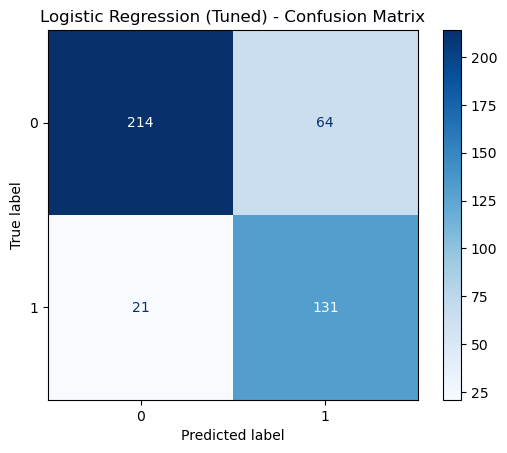

Cross-Validation Accuracy (Logistic Regression (Tuned)): 0.8343

Random Forest (Tuned)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Confusion Matrix:
 [[270   8]
 [ 14 138]]


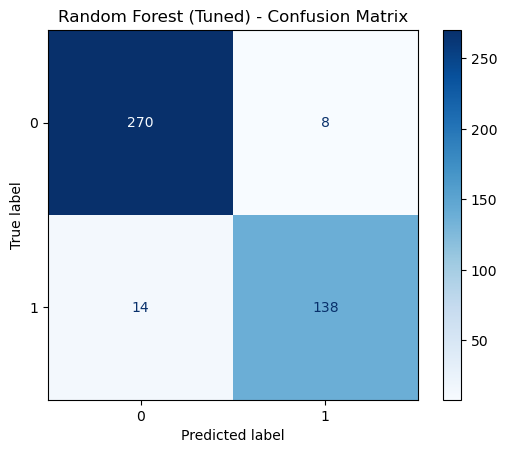

Cross-Validation Accuracy (Random Forest (Tuned)): 0.9339

SVM (Tuned)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       278
           1       0.79      0.80      0.79       152

    accuracy                           0.85       430
   macro avg       0.84      0.84      0.84       430
weighted avg       0.85      0.85      0.85       430

Confusion Matrix:
 [[245  33]
 [ 30 122]]


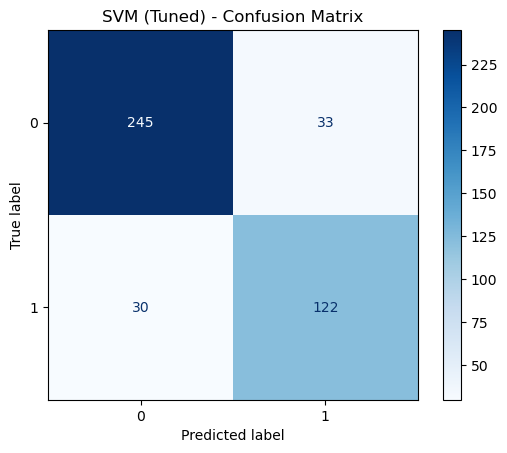

Cross-Validation Accuracy (SVM (Tuned)): 0.8366

KNN (Tuned)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.76       278
           1       0.57      0.68      0.62       152

    accuracy                           0.70       430
   macro avg       0.69      0.70      0.69       430
weighted avg       0.72      0.70      0.71       430

Confusion Matrix:
 [[198  80]
 [ 48 104]]


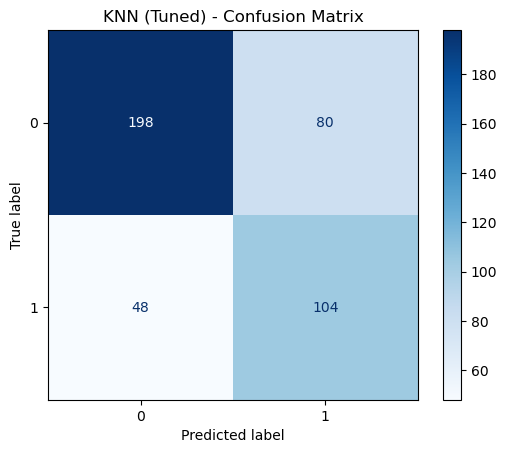

Cross-Validation Accuracy (KNN (Tuned)): 0.7482

Decision Tree (Tuned)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       278
           1       0.91      0.89      0.90       152

    accuracy                           0.93       430
   macro avg       0.92      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430

Confusion Matrix:
 [[264  14]
 [ 16 136]]


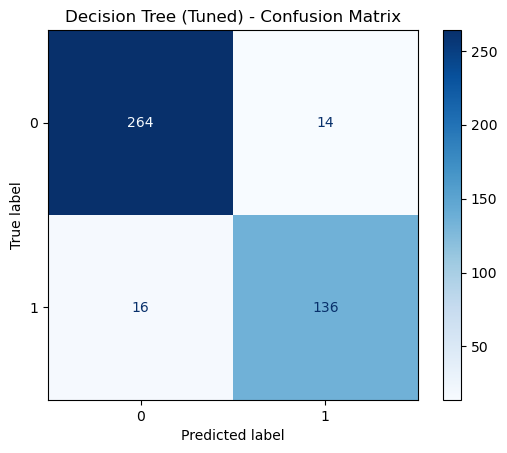

Cross-Validation Accuracy (Decision Tree (Tuned)): 0.9311


In [125]:

for name, model in tuned_models.items():
    print(f"\n{name}")
    y_pred = model.predict(X_test)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # Cross-validation score
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy ({name}): {np.mean(scores):.4f}")


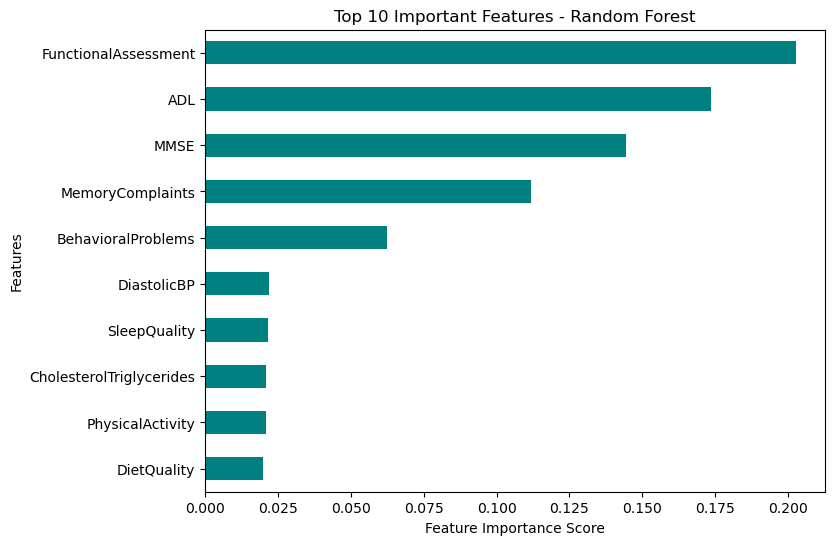

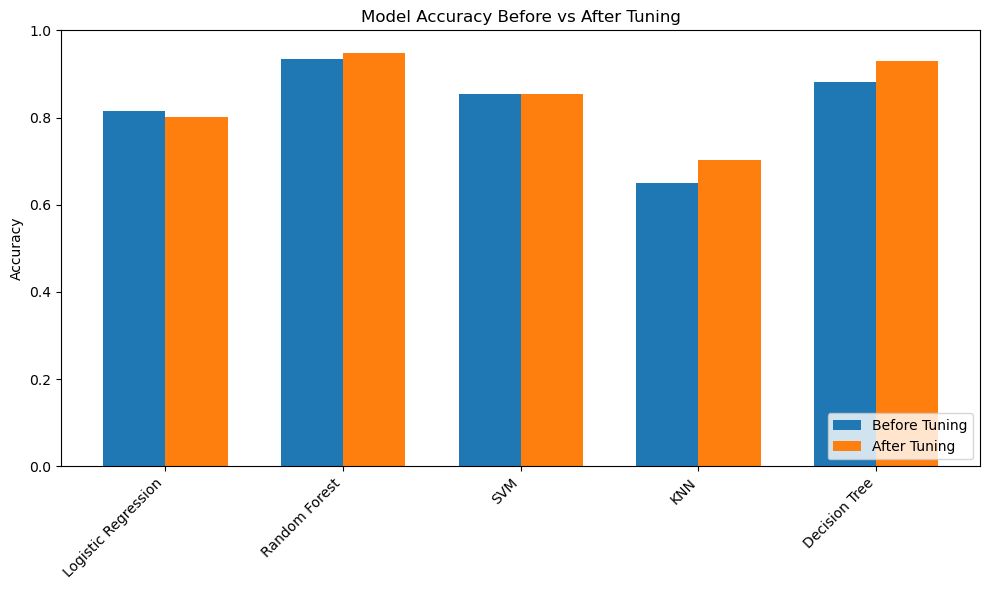

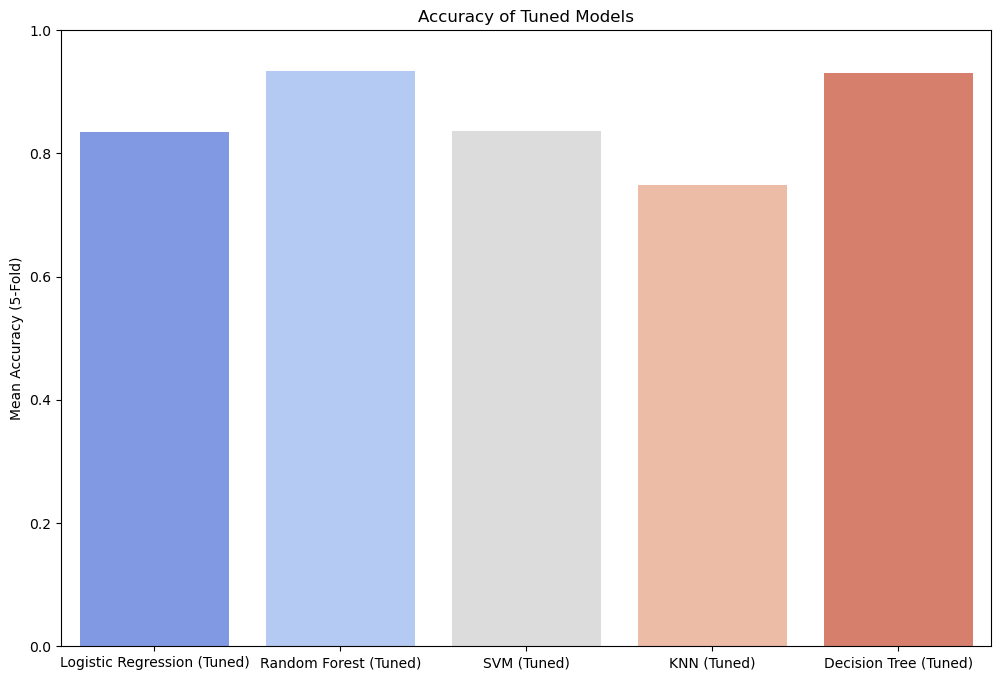

In [109]:
# ANALYSIS & VISUALIZATION 

# Feature Importance (Random Forest)
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

before_acc = pd.DataFrame(results).T['Accuracy']
after_acc = pd.DataFrame(tuned_results).T['Accuracy']

models = before_acc.index.tolist()

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, before_acc, width, label='Before Tuning', color='#1f77b4')
plt.bar(x + width/2, after_acc, width, label='After Tuning', color='#ff7f0e')

plt.title("Model Accuracy Before vs After Tuning")
plt.ylabel("Accuracy")
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Cross-validation Results Summary
cv_scores = {
    name: np.mean(cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy'))
    for name, model in tuned_models.items()
}

plt.figure(figsize=(12,8))
sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette="coolwarm")
plt.title("Accuracy of Tuned Models")
plt.ylabel("Mean Accuracy (5-Fold)")
plt.ylim(0, 1)
plt.show()



### Part 6️
### Analyze the Results

### a. What did you learn from the analysis?

After performing preprocessing steps such as feature scaling and SMOTE oversampling, the performance of all models improved, particularly in detecting the minority classes. 

Among all the algorithms, the Random Forest model achieved the best overall performance with an accuracy of around 0.93 after tuning, while Logistic Regression and SVM showed slightly lower values. 

Cross-validation also helped stabilize the metrics and reduced the variance between training and testing results, giving better model generalization.


### b. Did you find any patterns in your models or data?



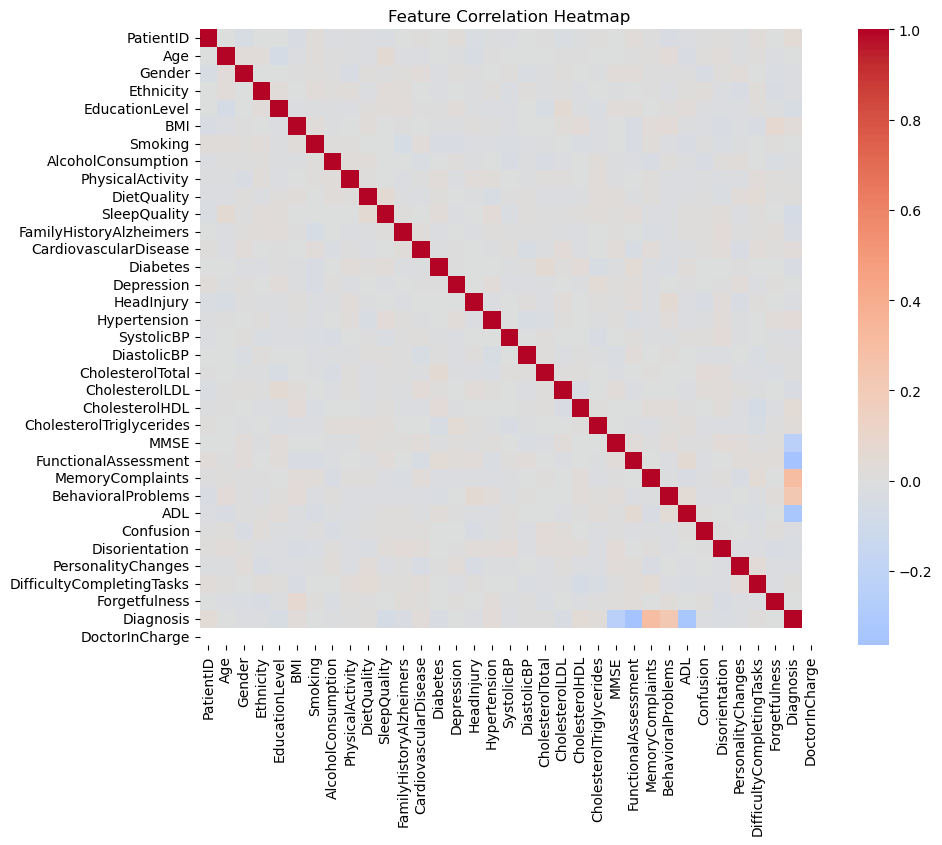

In [110]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


The correlation heatmap shows how different features in the Alzheimer’s dataset are related to each other.

Most variables have very weak correlations, meaning there is little multicollinearity and each feature contributes unique information. 

A few pairs, like CholesterolTotal, CholesterolLDL, and CholesterolTriglycerides, are moderately correlated since they all represent cholesterol-related measures. 

Similarly, MMSE, FunctionalAssessment, and MemoryComplaints show some positive correlation because they all measure aspects of cognitive ability.

### c. Provide a few key points that you learned from your results.

The evaluation results demonstrated that Random Forest performed the best among the three models due to its ability to handle nonlinear relationships and feature interactions effectively. 

Cross-validation improved the stability of results and slightly increased the F1-score for most models.

It was also evident that proper standardization was essential for SVM and Logistic Regression models to prevent bias from feature scaling differences. 

Finally, balancing the data using SMOTE proved to be an important step in improving the sensitivity of the classifiers toward under-represented classes.



Limitation of my project 



In [124]:
# COMPARE: ALL FEATURES vs. RFE-SELECTED FEATURES

print("FEATURE SET COMPARISON")


# Model with all features 
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train_res, y_train_res)
acc_all = accuracy_score(y_test, rf_all.predict(X_test))

# Model with only 8 RFE-selected features
X_train_selected = X_train_res[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train_res)
acc_selected = accuracy_score(y_test, rf_selected.predict(X_test_selected))

print(f"\nRandom Forest with ALL 32 features:      {acc_all:.4f}")
print(f"Random Forest with 8 RFE features:       {acc_selected:.4f}")
print(f"Difference:                               {acc_all - acc_selected:.4f}")

print("\nRFE-selected features performed better")



FEATURE SET COMPARISON

Random Forest with ALL 32 features:      0.9349
Random Forest with 8 RFE features:       0.9535
Difference:                               -0.0186

RFE-selected features performed better


While RFE analysis showed that 8
features could achieve comparable performance (95.35%
vs. 93.49%), final models used all 32 features, trading interpretability for information completeness.

### d. What conclusions can you draw from your findings?

#### Conclusion
In conclusion, the Random Forest model emerged as the most accurate and balanced classifier for predicting early Alzheimer’s disease. The study highlighted the importance of appropriate preprocessing, cross-validation, and parameter tuning in achieving reliable predictive performance. 

The discovered feature patterns align with known clinical indicators of Alzheimer’s, suggesting that the models captured meaningful relationships rather than noise. 

Overall, the findings suggest that machine-learning models, when properly optimized, can serve as a valuable decision-support tool for early Alzheimer’s detection and can assist medical professionals in identifying at risk patients more efficiently.